1. Environment Setup
Ensure necessary libraries are installed in Colab.

In [ ]:
# Install libraries if not already installed
!pip install pandas numpy scikit-learn nltk transformers


1. Upload Datasets
Google Colab allows you to upload files directly using the file upload widget.

In [ ]:
from google.colab import files

# Upload the datasets
uploaded = files.upload()


Saving dataset2.csv to dataset2.csv
Saving dataset1.csv to dataset1.csv


2. Load and Inspect the Datasets
Read dataset1.csv and dataset2.csv, inspect the data, and understand its structure.

In [ ]:
import pandas as pd

# Load datasets
dataset1 = pd.read_csv('dataset1.csv')  # Use the exact filename you uploaded
dataset2 = pd.read_csv('dataset2.csv')  # Use the exact filename you uploaded

# Display basic information
print("DATASET 1 INFO:")
print(dataset1.info())
print("\n \n")

print("DATASET 1 HEAD:")
print(dataset1.head())
print("\n \n")

print("DATASET 2 INFO:")
print(dataset2.info())
print("\n \n")

print("DATASET 2 HEAD:")
print(dataset2.head())
print("\n \n")


DATASET 1 INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31229 entries, 0 to 31228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            31229 non-null  object
 1   sub_category        28993 non-null  object
 2   crimeaditionalinfo  31222 non-null  object
dtypes: object(3)
memory usage: 732.1+ KB
None

 

DATASET 1 HEAD:
                                    category  \
0  RapeGang Rape RGRSexually Abusive Content   
1                     Online Financial Fraud   
2             Cyber Attack/ Dependent Crimes   
3                     Online Financial Fraud   
4                      Any Other Cyber Crime   

                           sub_category  \
0                                   NaN   
1  DebitCredit Card FraudSim Swap Fraud   
2                         SQL Injection   
3                     Fraud CallVishing   
4                                 Other   

                     

3. Exploratory Data Analysis (EDA)
Perform EDA to identify key patterns, missing values, or data imbalance.

In [ ]:
# Check for missing values
print("\nMissing Values Dataset 1:")
print(dataset1.isnull().sum())

print("\nMissing Values Dataset 2:")
print(dataset2.isnull().sum())

# Check class distribution
print("\nCategory Distribution in Dataset 1:")
print(dataset1['crimeaditionalinfo'].value_counts())

print("\nCategory Distribution in Dataset 2:")
print(dataset2['crimeaditionalinfo'].value_counts())



Missing Values Dataset 1:
category                 0
sub_category          2236
crimeaditionalinfo       7
dtype: int64

Missing Values Dataset 2:
category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64

Category Distribution in Dataset 1:
crimeaditionalinfo
Respected Sir\r\n\r\nA very serious matter I want to inform you Few person running or involve in some very shamefull activities by using few women at many places of kolkata gariahat ballygunge RUBY HOSPITAL BEHIND area KASBA ANANDAPUR QUEST MALL metropolis mall area ACROPOLISMALL area park circus FORUM MALL ELGIN RD Parkstreet MAIDAN AREA esplanade Garia jadavpur BEHALASAKHERBAZAR JOKA BANSDRONI  Rabindrasadanexide area  HARIDEVPUR triangular park lake mall area rashbehari area TOLLYGUNGE THAKURPUKUR BBD BAG DALHOUSIE AREA  and SALTLAKE\r\n\r\nTheir name \r\nSUBHRO SAHA AMLAN DATTA \r\nIZAZ AHMED Anirban\r\n\r\n\r\nThey officially work in a insurance office hdfclife  a hindustanpark ab gariaha

4. Data Preprocessing
Clean the text: tokenization, stopword removal, stemming, or lemmatization.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download necessary NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data package

# Preprocessing function
def preprocess_text(text):
    # Convert input to string to ensure compatibility with re.sub
    text = str(text)  # This line converts the input to string
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)

# Apply preprocessing
dataset1['cleaned_text'] = dataset1['crimeaditionalinfo'].apply(preprocess_text)
dataset2['cleaned_text'] = dataset2['crimeaditionalinfo'].apply(preprocess_text)

print("Sample Cleaned Text:")
print(dataset1['cleaned_text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample Cleaned Text:
0    sir namaskar mein ranjit kumar patrapais nehi ...
1               kotak mahindra bank fraud fraud amount
2    issu actual start got email first glanc seem l...
3    amit kumar karwi chitrakoot total depress frau...
4    order sare blous rinki sur paid amount take pa...
Name: cleaned_text, dtype: object


5. Exploratory Data Analysis (EDA)
Before building the model, let's explore the cleaned data to understand its distribution.

Code for EDA


 CATEGORY DISTRIBUTION IN DATASET 2:

category
Online Financial Fraud                                  18896
Online and Social Media Related Crime                    4139
Any Other Cyber Crime                                    3670
Cyber Attack/ Dependent Crimes                           1261
RapeGang Rape RGRSexually Abusive Content                 912
Sexually Obscene material                                 666
Hacking  Damage to computercomputer system etc            592
Sexually Explicit Act                                     535
Cryptocurrency Crime                                      166
Online Gambling  Betting                                  134
Child Pornography CPChild Sexual Abuse Material CSAM      123
Online Cyber Trafficking                                   61
Cyber Terrorism                                            52
Ransomware                                                 18
Crime Against Women & Children                              4
Name: count, dtype: in

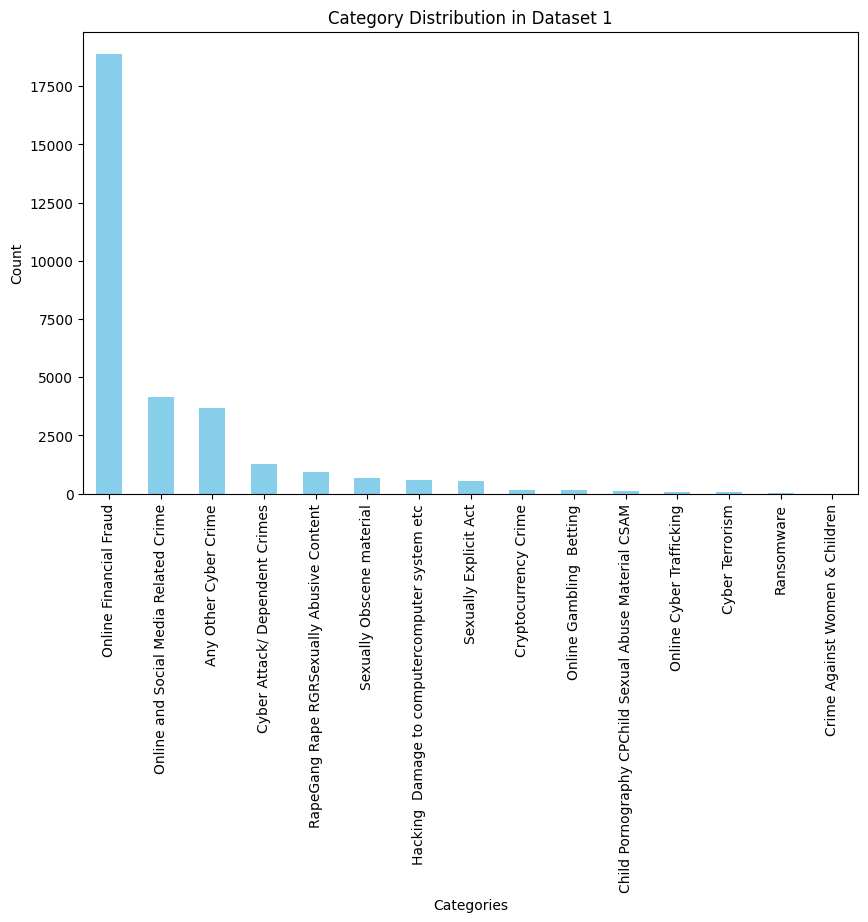


 UNIQUE SUBCATEGORIES IN DATASET 1:

[nan 'DebitCredit Card FraudSim Swap Fraud' 'SQL Injection'
 'Fraud CallVishing' 'Other' 'Internet Banking Related Fraud'
 'Unauthorised AccessData Breach' 'UPI Related Frauds'
 'Damage to computer computer systems etc' 'Cheating by Impersonation'
 'Malware Attack' 'EWallet Related Fraud' 'EMail Phishing'
 'Profile Hacking Identity Theft' 'Data Breach/Theft'
 'FakeImpersonating Profile' 'Email Hacking' 'Online Job Fraud'
 'Cyber Bullying  Stalking  Sexting' 'Hacking/Defacement'
 'Cryptocurrency Fraud' 'Online Matrimonial Fraud'
 'Tampering with computer source documents'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'DematDepository Fraud' 'Provocative Speech for unlawful acts'
 'Online Gambling  Betting' 'Ransomware Attack'
 'Business Email CompromiseEmail Takeover' 'Online Trafficking'
 'Cyber Terrorism' 'Impersonating Email' 'Website DefacementHacking'
 'Ransomware' 'Computer Generated CSAM/CSEM' 'Intimidating Email'
 

In [22]:
import matplotlib.pyplot as plt

# Check class distribution in dataset1
print("\n CATEGORY DISTRIBUTION IN DATASET 2:\n")
print(dataset1['category'].value_counts())

# Plot the category distribution
plt.figure(figsize=(10, 6))
dataset1['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Category Distribution in Dataset 1")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

# Check unique subcategories
print("\n UNIQUE SUBCATEGORIES IN DATASET 1:\n")
print(dataset1['sub_category'].unique())

# Repeat for dataset2 if necessary


CATEGORY DISTRIBUTION IN DATASET 2:

category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int6

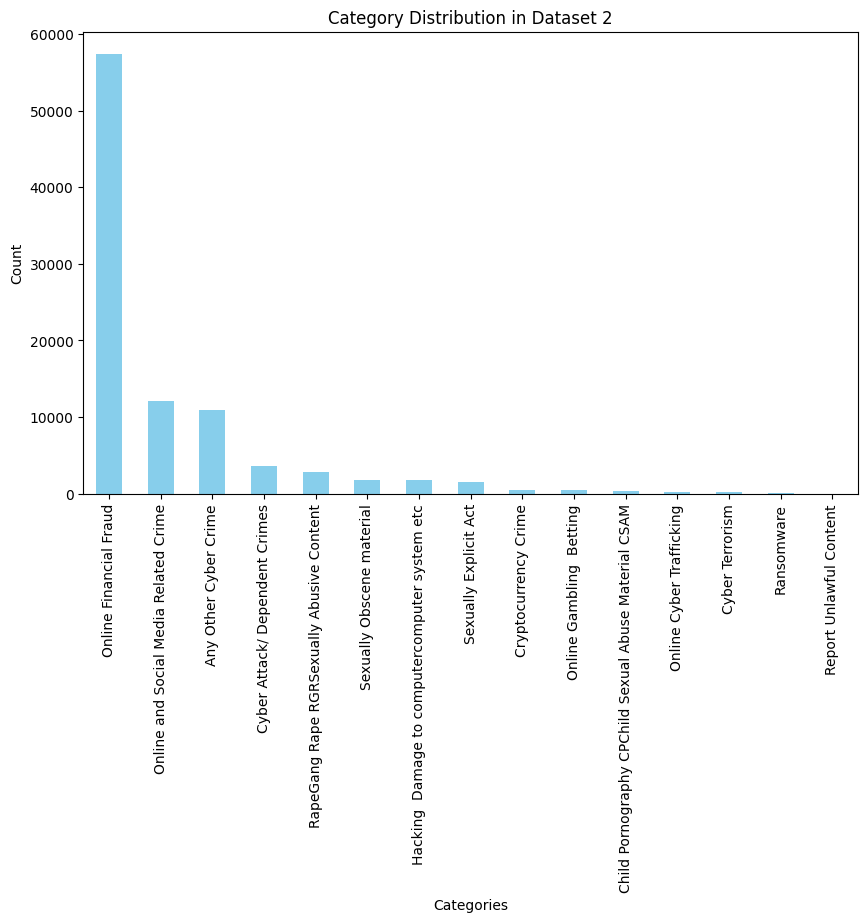


 UNIQUE SUBCATEGORIES IN DATASET 2:

[nan 'DebitCredit Card FraudSim Swap Fraud' 'SQL Injection'
 'Fraud CallVishing' 'Other' 'Internet Banking Related Fraud'
 'Unauthorised AccessData Breach' 'UPI Related Frauds'
 'Damage to computer computer systems etc' 'Cheating by Impersonation'
 'Malware Attack' 'EWallet Related Fraud' 'EMail Phishing'
 'Profile Hacking Identity Theft' 'Data Breach/Theft'
 'FakeImpersonating Profile' 'Email Hacking' 'Online Job Fraud'
 'Cyber Bullying  Stalking  Sexting' 'Hacking/Defacement'
 'Cryptocurrency Fraud' 'Online Matrimonial Fraud'
 'Tampering with computer source documents'
 'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks'
 'DematDepository Fraud' 'Provocative Speech for unlawful acts'
 'Online Gambling  Betting' 'Ransomware Attack'
 'Business Email CompromiseEmail Takeover' 'Online Trafficking'
 'Cyber Terrorism' 'Impersonating Email' 'Website DefacementHacking'
 'Ransomware' 'Computer Generated CSAM/CSEM' 'Intimidating Email'
 

In [21]:
import matplotlib.pyplot as plt

# Check class distribution in dataset1
print("CATEGORY DISTRIBUTION IN DATASET 2:\n")
print(dataset2['category'].value_counts())

# Plot the category distribution
plt.figure(figsize=(10, 6))
dataset2['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Category Distribution in Dataset 2")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show()

# Check unique subcategories
print("\n UNIQUE SUBCATEGORIES IN DATASET 2:\n")
print(dataset1['sub_category'].unique())

# Repeat for dataset2 if necessary


6. Text Vectorization
Convert the cleaned text into numerical features using TF-IDF or Bag-of-Words. We'll use TF-IDF for better handling of text data.

Code for TF-IDF Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the cleaned text
X_dataset1 = tfidf_vectorizer.fit_transform(dataset1['cleaned_text'])
X_dataset2 = tfidf_vectorizer.transform(dataset2['cleaned_text'])

# Extract labels
y_dataset1 = dataset1['category']


7. Train-Test Split
Split dataset1 into training and testing sets for building the model.

Code for Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dataset1, y_dataset1, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (24983, 5000)
Testing Data Shape: (6246, 5000)


8. Model Building
Choose a classifier like Logistic Regression, Random Forest, or advanced models like XGBoost. We'll use Logistic Regression as a baseline.

Code for Model Training

Accuracy: 0.7537624079410823

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.39      0.20      0.27       687
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00        26
                      Crime Against Women & Children       0.00      0.00      0.00         2
                                Cryptocurrency Crime       0.47      0.26      0.33        31
                      Cyber Attack/ Dependent Crimes       0.99      1.00      1.00       267
                                     Cyber Terrorism       0.00      0.00      0.00        15
      Hacking  Damage to computercomputer system etc       0.39      0.10      0.16       126
                            Online Cyber Trafficking       0.00      0.00      0.00        12
                              Online Financial Fraud       0.81      0.95      0.87      3787
                            Online Gambling  Betting       

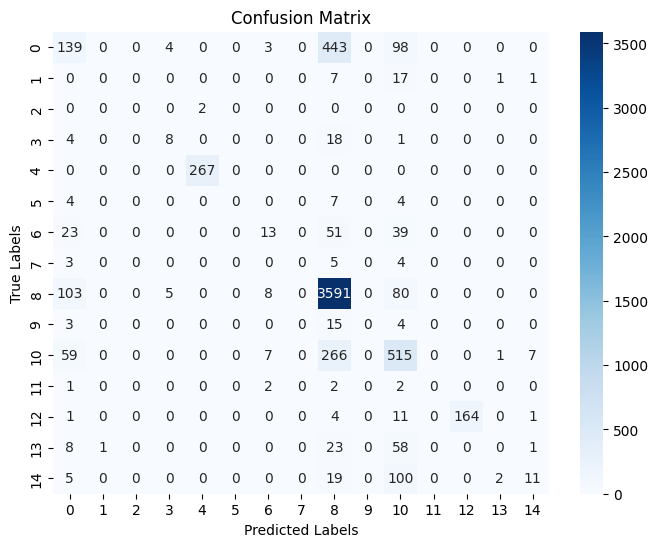

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


9. Fine-Tuning the Model
Experiment with different classifiers (e.g., Random Forest, SVM, or Neural Networks) or fine-tune hyperparameters for better performance.

Code for Hyperparameter Tuning (Optional)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# GridSearch for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.7465873759644096


10. Predict on Dataset 2
Use the trained model to classify dataset2.

Code for Predictions

In [27]:
# Predict categories for dataset2
dataset2['predicted_category'] = model.predict(X_dataset2)

# Display some predictions
print(dataset2[['crimeaditionalinfo', 'predicted_category']].head())


                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                      predicted_category  
0  Online and Social Media Related Crime  
1  Online and Social Media Related Crime  
2  Online and Social Media Related Crime  
3                 Online Financial Fraud  
4                  Any Other Cyber Crime  


11. Save the Model
Save the trained model and TF-IDF vectorizer for future use.

Code for Saving Model

In [28]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'text_classification_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

print("Model and Vectorizer Saved!")


Model and Vectorizer Saved!


1. Save the Model and Vectorizer
You likely saved your model and vectorizer like this:

In [34]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'text_classification_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

2. Load the Model and Vectorizer
To use the saved components for predictions:

In [35]:
import joblib

# Load the model and vectorizer
model = joblib.load('text_classification_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')


3. Test Predictions Locally
Ensure the saved components work correctly:

In [37]:
# Example test data
test_text = ["This is a test sentence"]

# Transform the text using the vectorizer
X_test = vectorizer.transform(test_text)

# Predict using the model
prediction = model.predict(X_test)

print(f"Prediction: {prediction}")


Prediction: ['Online Financial Fraud']


4. Build a Deployment System
Option A: Command-Line Tool
If you want to use the model locally via the terminal:

Create a Python script.
Parse user input and run predictions.

In [39]:
import joblib
import sys

model = joblib.load('text_classification_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

text = sys.argv[1:]
X_test = vectorizer.transform(text)
prediction = model.predict(X_test)

print(f"Prediction: {prediction}")


Prediction: ['Online Financial Fraud' 'Online Financial Fraud']


Code to Download Files:

In [41]:
from google.colab import files

# Download the model and vectorizer
files.download('text_classification_model.pkl')
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>